<a href="https://colab.research.google.com/github/Rahmamouradsayed/Data-governance-project/blob/main/data_governance_project_rahma_mourad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandera as pa
from pandera import Column, DataFrameSchema, Check, Index


In [ ]:
clean_data = pd.read_csv("Laptop Dataset.csv",encoding='utf-8')

In [ ]:
clean_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
clean_data.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
#identify duplicate rows
duplicate = clean_data[clean_data.duplicated()]
duplicate

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
duplicate = clean_data.duplicated().sum()

In [ ]:
#clean data from duplicates
clean_data.drop_duplicates()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
# mising values in columns
missing_values_count = clean_data.isnull().sum()
# print missing values in columns
missing_values_count[:]

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
# Drop the 'Unnamed: 0' column  not necessary
clean_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# calculate total number of missing values
total_cells = np.product(clean_data.shape)
total_missing = missing_values_count.sum()

# percentage of mising values
(total_missing/total_cells) * 100

2.5116863182864715

In [ ]:
# Calculate the mean value of the 'price' column
mean_price = clean_data['Price'].mean()

# Replace null values in 'price' column with the mean value
clean_data['Price'].fillna(mean_price, inplace=True)

In [ ]:
clean_data.dropna(inplace=True)

In [ ]:
clean_data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
clean_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


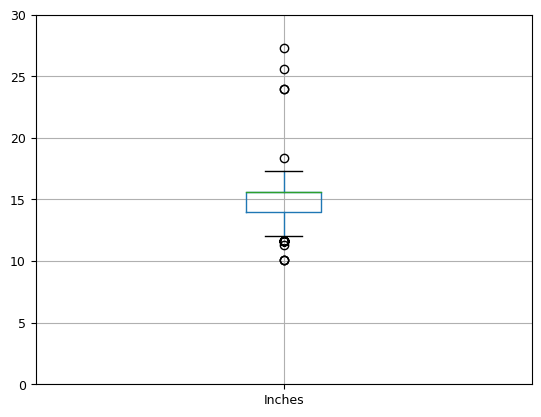

In [ ]:
# Clean the 'Inches' column
clean_data['Inches'] = pd.to_numeric(clean_data['Inches'], errors='coerce')

# Plot the boxplot with minimum and maximum values
boxplot = clean_data.boxplot(column=['Inches'], grid=True, fontsize=9)
plt.ylim(0, 30)  # Adjust the y-axis limits based on your data
plt.show()

In [ ]:
# Extract screen resolution width and height from the 'ScreenResolution' column
clean_data[['ResolutionWidth', 'ResolutionHeight']] = clean_data['ScreenResolution'].str.extract(r'(\d+)x(\d+)')

In [ ]:
# Handle missing values by filling them with 0
clean_data['ResolutionWidth'].fillna(0, inplace=True)
clean_data['ResolutionHeight'].fillna(0, inplace=True)

# Convert extracted width and height values to integer data type
clean_data['ResolutionWidth'] = clean_data['ResolutionWidth'].astype(int)
clean_data['ResolutionHeight'] = clean_data['ResolutionHeight'].astype(int)

In [ ]:
clean_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionWidth,ResolutionHeight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366,768


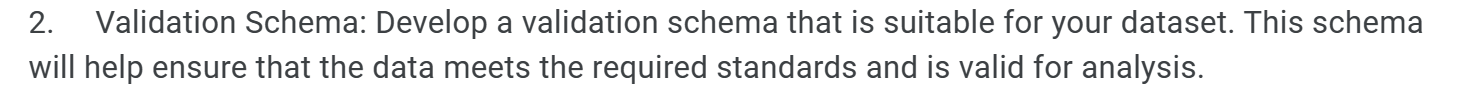

In [ ]:
# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = clean_data.copy()
scaled_data[['Inches', 'Price']] = scaler.fit_transform(clean_data[['Inches', 'Price']])

<Figure size 1000x500 with 0 Axes>

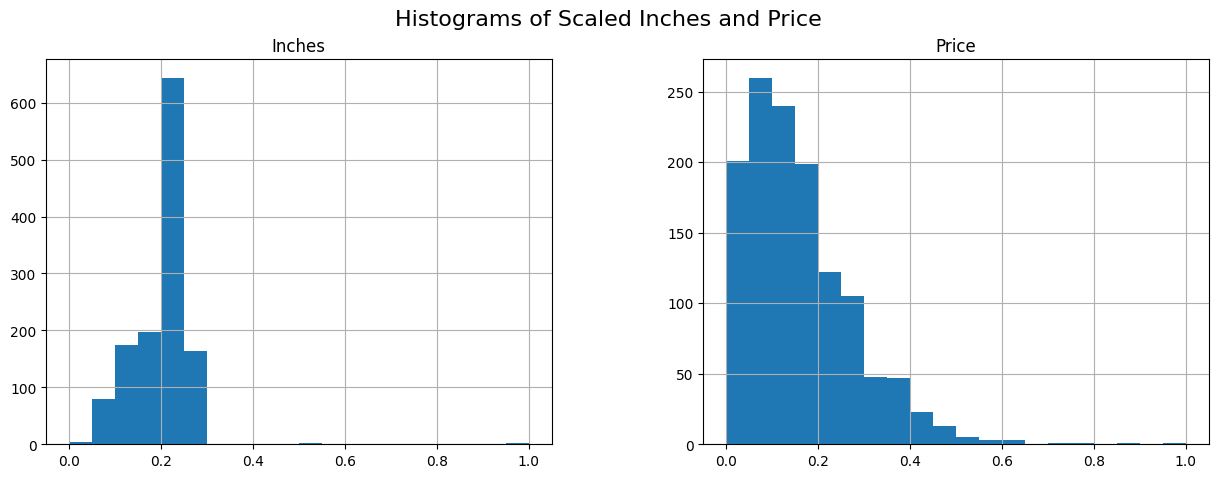

In [ ]:
# Plot histograms for scaled Inches and Price columns
plt.figure(figsize=(10, 5))
scaled_data[['Inches', 'Price']].hist(bins=20, figsize=(15, 5))
plt.suptitle('Histograms of Scaled Inches and Price', fontsize=16)
plt.show()

In [ ]:
# For categorical columns
clean_data_imputed = clean_data.fillna({"Company": "Unknown"})

In [ ]:
import pandas as pd
import pandera as pa

In [ ]:
# Define the validation schema
schema = pa.DataFrameSchema(
    {
        "Company": pa.Column(pa.String, nullable=False),
        "TypeName": pa.Column(pa.String),
        "Inches": pa.Column(pa.Float, nullable=True),  # Allow null values
        "ScreenResolution": pa.Column(pa.String),
        "Cpu": pa.Column(pa.String),
        "Ram": pa.Column(pa.String),
        "Memory": pa.Column(pa.String),
        "Gpu": pa.Column(pa.String),
        "OpSys": pa.Column(pa.String),
        "Weight": pa.Column(pa.String),
        "Price": pa.Column(pa.Float, checks=pa.Check.gt(0)),
    }
)


# Validate the DataFrame against the schema
validated_df = schema(clean_data)

# Display the validated DataFrame
print(validated_df)

     Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
130

In [ ]:
try:
    schema.validate(clean_data, lazy=True)
except pa.errors.SchemaErrors as exc:
    failure_cases_df = exc.failure_cases
    display(exc.failure_cases)

In [ ]:
!pip install pandera[io]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 14.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for petl: filename=petl-1.7.15-py3-none-any.whl size=230718 sha256=0e074b675d45048362c56f4c34ae1df0173858058c9e5fb16452e0ba42e4084e
  Stored in directory: /root/.cache/pip/wheels/25/98/91/62fbf9f9cb32952d7d91532152b893f7eab007f6aea750a3f5
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3569 sha256=6c8cc035e53481045a7890da41bb8c13708d5699c11943b5c21203ab07b606ec
  Store

In [ ]:
import pandera as pa
from pandera import Column, DataFrameSchema, Check, Index
inferred_schema = pa.infer_schema(clean_data).to_script()
print(inferred_schema)

from pandera import DataFrameSchema, Column, Check, Index, MultiIndex

schema = DataFrameSchema(
    columns={
        "Company": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "TypeName": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "Inches": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=10.1),
                Check.less_than_or_equal_to(max_value=35.6),
            ],
            nullable=True,
            unique=False,
            coerce=False,
            required=True,
            

In [ ]:
!pip install great_expectations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.3 MB/s eta 0:00:00


In [ ]:
import great_expectations as ge
df = ge.read_csv('Laptop Dataset.csv') # Load the dataset
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
# Create a context
context = ge.get_context()

  and should_run_async(code)

INFO:great_expectations.data_context.types.base:Created temporary directory '/tmp/tmpwsocokqw' for ephemeral docs site


In [ ]:
validator = context.sources.pandas_default.read_csv('Laptop Dataset.csv')

In [ ]:
validator.expect_column_values_to_not_be_null('Company')

  and should_run_async(code)

  warnings.warn(



Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": false,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "column": "Company",
      "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1303,
    "unexpected_count": 30,
    "unexpected_percent": 2.3023791250959325,
    "partial_unexpected_list": [
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
validator.expect_column_values_to_not_be_null('TypeName')

  and should_run_async(code)

  warnings.warn(



Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": false,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "column": "TypeName",
      "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1303,
    "unexpected_count": 30,
    "unexpected_percent": 2.3023791250959325,
    "partial_unexpected_list": [
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null,
      null
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
min_price = df['Price'].min()
max_price = df['Price'].max()
validator.expect_column_values_to_be_between("Price", min_value=min_price, max_value=max_price)

  and should_run_async(code)

  warnings.warn(



Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_be_between",
    "kwargs": {
      "min_value": 9270.72,
      "max_value": 324954.72,
      "column": "Price",
      "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1303,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 30,
    "missing_percent": 2.3023791250959325,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
validator.expect_column_values_to_be_unique(column='ScreenResolution')

  and should_run_async(code)

  warnings.warn(



Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": false,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_be_unique",
    "kwargs": {
      "column": "ScreenResolution",
      "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1303,
    "unexpected_count": 1265,
    "unexpected_percent": 99.37156323644933,
    "partial_unexpected_list": [
      "IPS Panel Retina Display 2560x1600",
      "1440x900",
      "Full HD 1920x1080",
      "IPS Panel Retina Display 2880x1800",
      "IPS Panel Retina Display 2560x1600",
      "1366x768",
      "IPS Panel Retina Display 2880x1800",
      "1440x900",
      "Full HD 1920x1080",
      "IPS Panel Full HD 1920x1080",
      "1366x768",
      "Full HD 1920x1080",
      "IPS Panel Retina Display 2880x1800",
      "Full HD 1920x1080",
      "IPS Panel Retina Display 2304x1440",
      "IPS Panel Retina Display 2560x1600",
      "Full HD 1920x1080",
      "IPS Panel Retina Display 2880x1800

In [ ]:
allowed_companies = ['Apple', 'HP', 'Lenovo']  # Define allowed company names
validator.expect_column_values_to_be_in_set('Company', value_set=allowed_companies)

  and should_run_async(code)

  warnings.warn(



Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": false,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_be_in_set",
    "kwargs": {
      "value_set": [
        "Apple",
        "HP",
        "Lenovo"
      ],
      "column": "Company",
      "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 1303,
    "unexpected_count": 696,
    "unexpected_percent": 54.673998428908085,
    "partial_unexpected_list": [
      "Acer",
      "Asus",
      "Acer",
      "Dell",
      "Dell",
      "Dell",
      "Dell",
      "Dell",
      "Dell",
      "Dell",
      "Chuwi",
      "Asus",
      "Dell",
      "Acer",
      "Dell",
      "Asus",
      "Dell",
      "Asus",
      "Acer",
      "Dell"
    ],
    "missing_count": 30,
    "missing_percent": 2.3023791250959325,
    "unexpected_percent_total": 53.41519570222564,
    "unexpected_percent_nonmissing": 54.673998428908085
  },
  "meta": {},
  "exception_info": {
    "raised_exception

In [ ]:
# Save the expectation suite
validator.save_expectation_suite(discard_failed_expectations=False)

  and should_run_async(code)



In [ ]:
# Run the checkpoint
checkpoint = context.add_checkpoint(name="my_checkpoint", validator=validator)
checkpoint_result = checkpoint.run()

Calculating Metrics:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
context.view_validation_result(checkpoint_result)
checkpoint_result

  and should_run_async(code)



{
  "run_id": {
    "run_name": null,
    "run_time": "2024-05-12T20:24:14.201807+00:00"
  },
  "run_results": {
    "ValidationResultIdentifier::default/__none__/20240512T202414.201807Z/default_pandas_datasource-#ephemeral_pandas_asset": {
      "validation_result": {
        "success": false,
        "results": [
          {
            "success": false,
            "expectation_config": {
              "expectation_type": "expect_column_values_to_not_be_null",
              "kwargs": {
                "column": "Company",
                "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
              },
              "meta": {}
            },
            "result": {
              "element_count": 1303,
              "unexpected_count": 30,
              "unexpected_percent": 2.3023791250959325,
              "partial_unexpected_list": [
                null,
                null,
                null,
                null,
                null,
                null,
  

In [ ]:
num_passed = 0
# num_failed = 0
for key, value in checkpoint_result['run_results'].items():
    # Check if the key contains validation results
    if 'validation_result' in value:
        validation_result = value['validation_result']
        num_passed += validation_result['statistics']['successful_expectations']
        # num_failed += validation_result['statistics']['unsuccessful_expectations']
print(f"Passed validations: {num_passed}")
# print(f"Failed validations: {num_failed}")

Passed validations: 1


In [ ]:
for key, value in checkpoint_result['run_results'].items():
    # Check if the key contains validation results
    if 'validation_result' in value:
        validation_result = value['validation_result']
        for result in validation_result['results']:
            if result['success']:
                print("Validation passed:", result['expectation_config']['expectation_type'])
            # else:
            #     print("Validation failed:", result['expectation_config']['expectation_type'])

Validation passed: expect_column_values_to_be_between


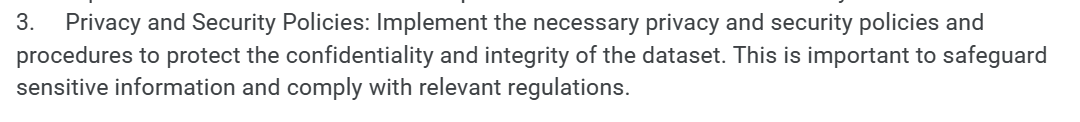

In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


In [ ]:
# Load the dataset
df = pd.read_csv('Laptop Dataset.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df.dropna(inplace=True)

  and should_run_async(code)



In [ ]:
import string
#Randomization Technique
def randomize_values(df):
    for column in df.columns:
        if df[column].dtype == 'O': # check if column has object dtype
            df[column] = [''.join(random.choices(string.ascii_letters + string.digits, k=10))
            for _ in range(len(df))] # generate a list of random strings
    return df

In [ ]:
# apply function to dataframe
df_rand1 = randomize_values(df)
df_rand1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,jr1DvCzH58,QasPlMbuQB,pdYXK6ovcb,NkcqNkhFFl,9McySHjefc,fn8SMu9Xq3,2fOioZ1JHd,SaaXpIwdZQ,VAPXnpxEtj,a2vlW33X4C,71378.6832
1,1.0,suAJdFnSMY,nIuQRiZO80,mWY9LUrBmF,ZalfXHj37S,RlIGBfx0B7,mOkYNOzFTA,CeroOudsha,Z7yMHcxbJ0,TxPt3d5Oam,5z8nx0mZPz,47895.5232
2,2.0,vB4tRl6kud,A7SWFjpxvk,0FJsdtWN7U,3NmdPW3os4,lKeMg4r05B,VwLWhb1peH,iaYuQmkALt,7mvVgezPCj,KpT3BFus8c,PQYbIcMjQ8,30636.0000
3,3.0,q2lM4n7KwU,YvdHTlO5yH,ZmxiEFtYZW,uw7htqFgJH,3vEJyZQCJL,E1hEfSbV15,qflRlxMF6Y,122110S7iY,xYkbD325G1,ttKkJDWRKI,135195.3360
4,4.0,z4k5Aj9Xg9,63NPlIPKf1,IqEzrokSGE,PTOQe41ivR,AmZymqYLIh,larePWRev1,MY36suPrIO,KatEqzLFBg,hJiWP03xZs,xEnXdHYjXs,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,dgjvPPI4Yy,JextedFFQ7,Awnqqa6nLC,szSFSxMzXe,Cm56l3PuDG,v2CeSQtRYd,daYaw54ID4,YhjL5P29sp,AT8sz68W5q,3oL5Q0i5ij,33992.6400
1299,1299.0,mWdYuPuYHO,rRjKTMK7tL,4brQUGf0aC,DgHfiD2xvU,DXsSSPLlDC,F62pTxkot4,6w6bpvxE8U,4GLg4LAbUL,vL0IgDJrIc,WSrvGnPUbO,79866.7200
1300,1300.0,FCtQODZIxZ,WtbRBr303A,vvwWqZVhlm,fxRJseuoKI,y9j6nOarlR,ITPcSHgTWm,wSXys7E5rj,zyma9KZXDr,WXSxKmCAp3,fSjQbWnjC8,12201.1200
1301,1301.0,AVCnzVuf5J,xz5VFrwnmP,7YfqNRgtsU,IERBNgLVvt,I7BdCwyoma,eMZKTyxAJ6,5aMMh9jZyP,TgoJoTOfax,5NrkcItezn,3OfDYySChf,40705.9200


In [ ]:
#2-Generalization:
# Convert 'Inches' column to numeric, handling non-numeric values
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

# Define bins and labels for anonymization
inch_bins = [10, 13, 15, 17, 20]
inch_labels = ['10-12', '13-14', '15-16', '17-20']

# Anonymize the Inches column by grouping them into inch ranges
df['Inches'] = pd.cut(df['Inches'], bins=inch_bins, labels=inch_labels)

# Anonymize the Price column by grouping them into price ranges
price_bins = [0, 50000, 100000, 150000, 200000, 300000]
price_labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
df['Price'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# Display the anonymized DataFrame
print(df)

  and should_run_async(code)



      Unnamed: 0     Company    TypeName Inches ScreenResolution         Cpu  \
0            0.0  jr1DvCzH58  QasPlMbuQB    NaN       NkcqNkhFFl  9McySHjefc   
1            1.0  suAJdFnSMY  nIuQRiZO80    NaN       ZalfXHj37S  RlIGBfx0B7   
2            2.0  vB4tRl6kud  A7SWFjpxvk    NaN       3NmdPW3os4  lKeMg4r05B   
3            3.0  q2lM4n7KwU  YvdHTlO5yH    NaN       uw7htqFgJH  3vEJyZQCJL   
4            4.0  z4k5Aj9Xg9  63NPlIPKf1    NaN       PTOQe41ivR  AmZymqYLIh   
...          ...         ...         ...    ...              ...         ...   
1298      1298.0  dgjvPPI4Yy  JextedFFQ7    NaN       szSFSxMzXe  Cm56l3PuDG   
1299      1299.0  mWdYuPuYHO  rRjKTMK7tL    NaN       DgHfiD2xvU  DXsSSPLlDC   
1300      1300.0  FCtQODZIxZ  WtbRBr303A    NaN       fxRJseuoKI  y9j6nOarlR   
1301      1301.0  AVCnzVuf5J  xz5VFrwnmP    NaN       IERBNgLVvt  I7BdCwyoma   
1302      1302.0  ZHiRa3ohAQ  ccnSAGPAF9    NaN       xcNxS3o0kD  XrtMS869HK   

             Ram      Memory         Gp

In [ ]:
#3-Perturbation
import numpy as np



def add_noise(dfp, column, std = None):   #std=standaard deviation
    if std == None:
        std = dfp[column].std()

    withNoise = dfp[column].add(np.random.normal(0, std, dfp.shape[0]))
    copy = dfp.copy()
    copy[column] = withNoise
    return copy

perturbation = add_noise(df, 'Price', std=100)
perturbation

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71314.874306
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,48044.928173
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30617.883027
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135297.418956
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96151.131343
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,34077.785088
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,80024.745574
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12177.229309
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40673.774159


In [ ]:
#Suppression:
import pandas as pd


# Drop columns for suppression
columns_to_drop = ['ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']
df_sup = perturbation.drop(columns=columns_to_drop)

# Display the suppressed DataFrame
print(df_sup)

      Unnamed: 0 Company            TypeName Inches  Weight          Price
0            0.0   Apple           Ultrabook   13.3  1.37kg   71314.874306
1            1.0   Apple           Ultrabook   13.3  1.34kg   48044.928173
2            2.0      HP            Notebook   15.6  1.86kg   30617.883027
3            3.0   Apple           Ultrabook   15.4  1.83kg  135297.418956
4            4.0   Apple           Ultrabook   13.3  1.37kg   96151.131343
...          ...     ...                 ...    ...     ...            ...
1298      1298.0  Lenovo  2 in 1 Convertible     14   1.8kg   34077.785088
1299      1299.0  Lenovo  2 in 1 Convertible   13.3   1.3kg   80024.745574
1300      1300.0  Lenovo            Notebook     14   1.5kg   12177.229309
1301      1301.0      HP            Notebook   15.6  2.19kg   40673.774159
1302      1302.0    Asus            Notebook   15.6   2.2kg   19526.720986

[1303 rows x 6 columns]


In [ ]:
#Synthetic:

from faker import Faker
import pandas as pd

faker = Faker()


synthetic_data = {
    'Company': [faker.company() for _ in range(len(df_sup))],
    'TypeName': [faker.word() for _ in range(len(df_sup))],
    'Inches': [faker.random_int(10, 20) for _ in range(len(df_sup))],
    'ScreenResolution': [faker.sentence() for _ in range(len(df_sup))],
    'Cpu': [faker.word() for _ in range(len(df))],
    'Ram': [faker.random_element(elements=('4GB', '8GB', '16GB', '32GB')) for _ in range(len(df_sup))],
    'Memory': [faker.random_element(elements=('128GB SSD', '256GB SSD', '512GB SSD', '1TB HDD')) for _ in range(len(df_sup))],
    'Gpu': [faker.word() for _ in range(len(df))],
    'OpSys': [faker.random_element(elements=('Windows 10', 'macOS', 'No OS')) for _ in range(len(df_sup))],
    'Weight': [faker.random_int(1, 5) for _ in range(len(df_sup))],  # Assuming weight in kg
    'Price': [faker.random_int(500, 3000) for _ in range(len(df_sup))],  # Assuming price in $
}

df_synthetic = pd.DataFrame(synthetic_data)

print(df_synthetic)


                        Company TypeName  Inches  \
0                  Wilson-Jones   ground      20   
1                  Gonzalez PLC     some      20   
2     Wade, Thompson and Harvey  quality      12   
3        Greer, Orozco and Reed    hotel      12   
4                      Long PLC     area      13   
...                         ...      ...     ...   
1298                   York Ltd  prepare      12   
1299                  Ruiz-Hart     then      18   
1300              Thomas-Miller     draw      13   
1301        Strickland and Sons  imagine      15   
1302                Lynch-Smith     such      19   

                                       ScreenResolution     Cpu   Ram  \
0         Beat large church activity outside education.    look   8GB   
1       Rich big us myself hold total toward according.  really  16GB   
2               Attention magazine project shake color.    drug   8GB   
3                                 Again big beat young.     our  16GB   
4         

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Define a function to tokenize data in a specific column
def tokenize_data(data):
    if isinstance(data, str):
        return word_tokenize(data)
    else:
        return []


df_synthetic['Tokenized_ScreenResolution'] = df_synthetic['ScreenResolution'].apply(tokenize_data)

df_synthetic

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Tokenized_ScreenResolution
0,Wilson-Jones,ground,20,Beat large church activity outside education.,look,8GB,128GB SSD,amount,macOS,2,2976,"[Beat, large, church, activity, outside, educa..."
1,Gonzalez PLC,some,20,Rich big us myself hold total toward according.,really,16GB,128GB SSD,its,macOS,3,2193,"[Rich, big, us, myself, hold, total, toward, a..."
2,"Wade, Thompson and Harvey",quality,12,Attention magazine project shake color.,drug,8GB,128GB SSD,involve,Windows 10,5,1657,"[Attention, magazine, project, shake, color, .]"
3,"Greer, Orozco and Reed",hotel,12,Again big beat young.,our,16GB,512GB SSD,thus,No OS,4,2454,"[Again, big, beat, young, .]"
4,Long PLC,area,13,Than trouble play other.,reveal,16GB,128GB SSD,important,Windows 10,2,739,"[Than, trouble, play, other, .]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,York Ltd,prepare,12,Sort history realize sometimes political live ...,method,4GB,128GB SSD,Mr,No OS,1,1715,"[Sort, history, realize, sometimes, political,..."
1299,Ruiz-Hart,then,18,Art shoulder fast.,game,32GB,1TB HDD,worker,Windows 10,4,631,"[Art, shoulder, fast, .]"
1300,Thomas-Miller,draw,13,Protect financial report oil.,stage,32GB,256GB SSD,travel,No OS,4,1205,"[Protect, financial, report, oil, .]"
1301,Strickland and Sons,imagine,15,During read avoid worker boy.,travel,4GB,512GB SSD,father,macOS,2,1185,"[During, read, avoid, worker, boy, .]"


In [ ]:

import pandas as pd
import hashlib


def hash_data(data):
    return hashlib.sha256(data.encode()).hexdigest()

df_synthetic['Hashed_ScreenResolution'] = df_synthetic['ScreenResolution'].apply(lambda x: hash_data(str(x)))


df_synthetic

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Tokenized_ScreenResolution,Hashed_ScreenResolution
0,Wilson-Jones,ground,20,Beat large church activity outside education.,look,8GB,128GB SSD,amount,macOS,2,2976,"[Beat, large, church, activity, outside, educa...",8acdb5dda5fe1c89fc190bfab4f92fc4fb3feac6e76f6f...
1,Gonzalez PLC,some,20,Rich big us myself hold total toward according.,really,16GB,128GB SSD,its,macOS,3,2193,"[Rich, big, us, myself, hold, total, toward, a...",1878e082cdf87500d8ec26cb84201a8dde16661521e85b...
2,"Wade, Thompson and Harvey",quality,12,Attention magazine project shake color.,drug,8GB,128GB SSD,involve,Windows 10,5,1657,"[Attention, magazine, project, shake, color, .]",0c2901770ca6e146ef38e922d6b3fe4c4ba9a2ddd0ab84...
3,"Greer, Orozco and Reed",hotel,12,Again big beat young.,our,16GB,512GB SSD,thus,No OS,4,2454,"[Again, big, beat, young, .]",a6560ce900b6e5febd5d9515f7872712b2c6c00c1db4a2...
4,Long PLC,area,13,Than trouble play other.,reveal,16GB,128GB SSD,important,Windows 10,2,739,"[Than, trouble, play, other, .]",2266e8851e230c5a891702cda7c839cb24b137c06edb30...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,York Ltd,prepare,12,Sort history realize sometimes political live ...,method,4GB,128GB SSD,Mr,No OS,1,1715,"[Sort, history, realize, sometimes, political,...",5038703521e94c888c6305f9af0fbd3ceee0e74df252c8...
1299,Ruiz-Hart,then,18,Art shoulder fast.,game,32GB,1TB HDD,worker,Windows 10,4,631,"[Art, shoulder, fast, .]",dbcf93698b8a198ebc9dd741dba94d8196ef02311235c6...
1300,Thomas-Miller,draw,13,Protect financial report oil.,stage,32GB,256GB SSD,travel,No OS,4,1205,"[Protect, financial, report, oil, .]",a820faa6e661aa2f143b3e25d760b62f380ac11f002aa0...
1301,Strickland and Sons,imagine,15,During read avoid worker boy.,travel,4GB,512GB SSD,father,macOS,2,1185,"[During, read, avoid, worker, boy, .]",c79e851d676a4fb3fe32f89818334476ab5470c8dcfac3...


In [ ]:


import pandas as pd
from cryptography.fernet import Fernet


df_hash = df_synthetic.dropna(subset=['Company'])


key = Fernet.generate_key()
cipher = Fernet(key)

# Define a function to encrypt data using the provided cipher
def encrypt_data(data):
    return cipher.encrypt(data.encode()).decode()

# Encrypt the 'Company' column using a lambda function
df_hash['Encrypted_Company'] = df_hash['Company'].apply(lambda x: encrypt_data(str(x)))

# Display the DataFrame with the encrypted company data
df_hash

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Tokenized_ScreenResolution,Hashed_ScreenResolution,Encrypted_Company
0,Wilson-Jones,ground,20,Beat large church activity outside education.,look,8GB,128GB SSD,amount,macOS,2,2976,"[Beat, large, church, activity, outside, educa...",8acdb5dda5fe1c89fc190bfab4f92fc4fb3feac6e76f6f...,gAAAAABmQSeA1selah7wgJv-U-GhdDv1HgJpOLodnw820T...
1,Gonzalez PLC,some,20,Rich big us myself hold total toward according.,really,16GB,128GB SSD,its,macOS,3,2193,"[Rich, big, us, myself, hold, total, toward, a...",1878e082cdf87500d8ec26cb84201a8dde16661521e85b...,gAAAAABmQSeAUUCGLTIXN4Ldnj34wL-JKoPfZoS3sJ2B9u...
2,"Wade, Thompson and Harvey",quality,12,Attention magazine project shake color.,drug,8GB,128GB SSD,involve,Windows 10,5,1657,"[Attention, magazine, project, shake, color, .]",0c2901770ca6e146ef38e922d6b3fe4c4ba9a2ddd0ab84...,gAAAAABmQSeAXTcXrwx312G5fvh-gTB56ovfW5VeSLm94G...
3,"Greer, Orozco and Reed",hotel,12,Again big beat young.,our,16GB,512GB SSD,thus,No OS,4,2454,"[Again, big, beat, young, .]",a6560ce900b6e5febd5d9515f7872712b2c6c00c1db4a2...,gAAAAABmQSeA8B2RBfyYEoJ6Ysm4-QB6njh7kAYLpRW0ze...
4,Long PLC,area,13,Than trouble play other.,reveal,16GB,128GB SSD,important,Windows 10,2,739,"[Than, trouble, play, other, .]",2266e8851e230c5a891702cda7c839cb24b137c06edb30...,gAAAAABmQSeAgaEhCFvaXdmwFEbsYzEMzbIapkR_7RO5FN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,York Ltd,prepare,12,Sort history realize sometimes political live ...,method,4GB,128GB SSD,Mr,No OS,1,1715,"[Sort, history, realize, sometimes, political,...",5038703521e94c888c6305f9af0fbd3ceee0e74df252c8...,gAAAAABmQSeAxpG8pTpii6t9vfu63-a3PYAyJ1IQulnVVZ...
1299,Ruiz-Hart,then,18,Art shoulder fast.,game,32GB,1TB HDD,worker,Windows 10,4,631,"[Art, shoulder, fast, .]",dbcf93698b8a198ebc9dd741dba94d8196ef02311235c6...,gAAAAABmQSeAEC2WuLaq4nA6qnwY73f7Y7rvzlM0dFOqTP...
1300,Thomas-Miller,draw,13,Protect financial report oil.,stage,32GB,256GB SSD,travel,No OS,4,1205,"[Protect, financial, report, oil, .]",a820faa6e661aa2f143b3e25d760b62f380ac11f002aa0...,gAAAAABmQSeAadM00J7LVlWEV-AJJO-gsLKonbwC3N0Xwy...
1301,Strickland and Sons,imagine,15,During read avoid worker boy.,travel,4GB,512GB SSD,father,macOS,2,1185,"[During, read, avoid, worker, boy, .]",c79e851d676a4fb3fe32f89818334476ab5470c8dcfac3...,gAAAAABmQSeA80R6kqhanlBQtIB3fusEdvpu1EdAxjQuJ5...


In [ ]:
df_hash


df_hash.to_csv('data_processed.csv', index=False)


from google.colab import files
files.download('data_processed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# Define the file path
file_path = "Laptop Dataset.csv"

In [ ]:
# Check if the current user has read access to the file
if os.access(file_path, os.R_OK):
    print("Read access granted.")
else:
    print("Read access denied.")

Read access granted.


In [ ]:
# Check if the current user has read access to the file
if os.access(file_path, os.R_OK):
    print("Read access granted.")

# Check if the current user has write access to the file
if os.access(file_path, os.W_OK):
    print("Write access granted.")

# Check if the current user has execute access to the file
if os.access(file_path, os.X_OK):
    print("Execute access granted.")
else:
    print("Excute access denied.")

Read access granted.
Write access granted.
Excute access denied.


In [ ]:
class FileAccessControl:
    def __init__(self):
        self.permissions = {}

    def grant_permission(self, file, user, permission):
        if file not in self.permissions:
            self.permissions[file] = {}
        if user not in self.permissions[file]:
            self.permissions[file][user] = []
        self.permissions[file][user].append(permission)

    def check_permission(self, file, user, permission_requested):
        if file in self.permissions and user in self.permissions[file]:
            return permission_requested in self.permissions[file][user]
        return False

In [ ]:
file_access_control = FileAccessControl()
file_access_control.grant_permission("Laptop Dataset.csv", "user", "read")

In [ ]:
def access_file(user, file, permission_requested):
    if file_access_control.check_permission(file, user, permission_requested):
        print(f"Access granted to {user} for {permission_requested} on {file}.")
    else:
        print(f"Access denied to {user} for {permission_requested} on {file}.")

In [ ]:
access_file("user1", "Laptop Dataset.csv", "read")
access_file("user2", "Laptop Dataset.csv", "write")
access_file("user3", "Laptop Dataset.csv", "read")

Access denied to user1 for read on Laptop Dataset.csv.
Access denied to user2 for write on Laptop Dataset.csv.
Access denied to user3 for read on Laptop Dataset.csv.
